In [50]:
# Load the Important Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [51]:
# Setting the Style Parameters
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [52]:
# Load the Dataset 
df = pd.read_csv("daily-website-visitors.csv")

Dataset Overview

In [53]:
# Display the first few rows of the dataset
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [54]:
# Display the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [55]:
# Display the description of the Dataset
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


Handling Missing Values

In [56]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


Handling Duplicates Values

In [57]:
# Displaying the number of duplicate rows
df.duplicated().sum()

0

In [58]:
# Getting the shape of the dataframe
df.shape

(2167, 8)

Handling Date Formatting

In [59]:
# Formatting the date column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,"2,146","1,582","1,430",152
2014-09-15,2,Monday,2,"3,621","2,528","2,297",231
2014-09-16,3,Tuesday,3,"3,698","2,630","2,352",278
2014-09-17,4,Wednesday,4,"3,667","2,614","2,327",287
2014-09-18,5,Thursday,5,"3,316","2,366","2,130",236


Handling Datatype Formatting

In [60]:
# Convert numerical columns to int64
df[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']] = \
    df[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']] \
    .apply(lambda x: x.str.replace(',', '').astype('int64'))

df.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236


In [61]:
# Display the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 135.4+ KB


In [62]:
# Display the description of the Dataset
df.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


Analysis of Traffic Metrics

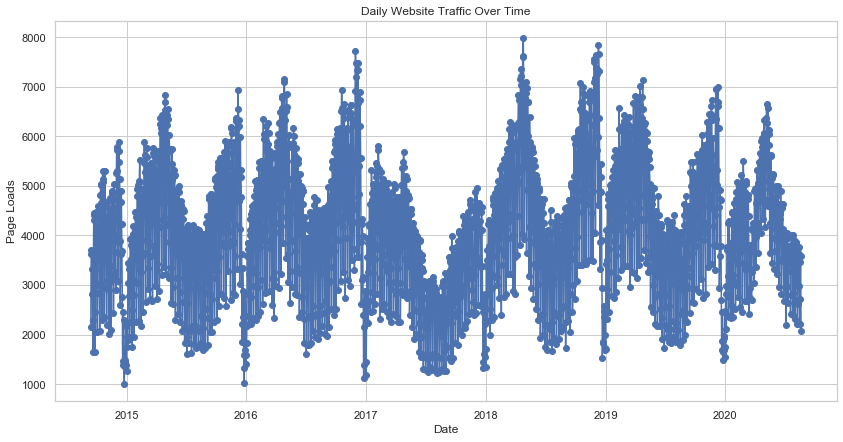

In [63]:
# Daily Website Traffic Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], marker='o', linestyle='-', color='b')
plt.title('Daily Website Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.show()

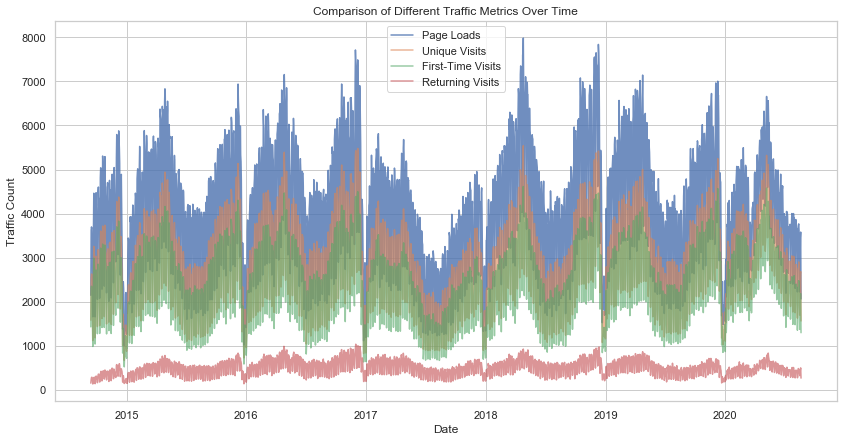

In [64]:
# Comparison of Different Traffic Metrics Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], label='Page Loads', alpha=0.8)
plt.plot(df.index, df['Unique.Visits'], label='Unique Visits', alpha=0.6)
plt.plot(df.index, df['First.Time.Visits'], label='First-Time Visits', alpha=0.6)
plt.plot(df.index, df['Returning.Visits'], label='Returning Visits', alpha=0.6)
plt.legend()
plt.title('Comparison of Different Traffic Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Count')
plt.show()

<Figure size 1008x504 with 0 Axes>

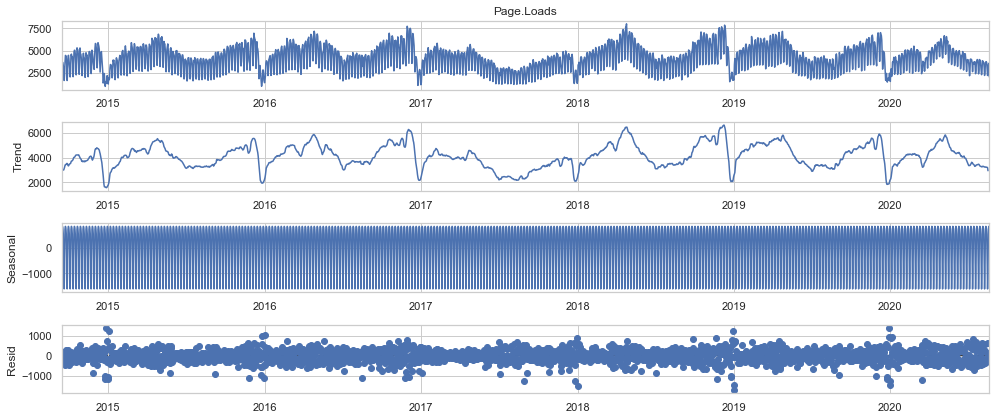

In [65]:
# Time Series Decomposition of Page Loads
plt.figure(figsize=(14, 7))
decomposition = seasonal_decompose(df['Page.Loads'], model='additive', period=7)
decomposition.plot()
plt.show()

Feature Engineering

In [66]:
# Feature Engineering
df['Year'] = df.index.year.astype('int64')
df['Month'] = df.index.month.astype('int64')
df['Week'] = df.index.isocalendar().week.astype('int64')
df['Day'] = df.index.day.astype('int64')
df['Day_Of_Week'] = df.index.dayofweek.astype('int64')
df['Is_Weekend'] = (df['Day_Of_Week'] >= 5).astype('int64')

# Lag features
df['Lag_1'] = df['Page.Loads'].shift(1).astype('float64')
df['Lag_7'] = df['Page.Loads'].shift(7).astype('float64')

# Rolling statistics
df['Rolling_Mean_7'] = df['Page.Loads'].rolling(window=7).mean().astype('float64')

# Handle NaN values
df.fillna(method='bfill', inplace=True)

df.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Year,Month,Week,Day_Of_Week,Is_Weekend,Lag_1,Lag_7,Rolling_Mean_7
Date,,,,,,,,,,,,,,,
2014-09-14,1,14,1,2146,1582,1430,152,2014,9,37,6,1,2146.0,2146.0,2988.714286
2014-09-15,2,15,2,3621,2528,2297,231,2014,9,38,0,0,2146.0,2146.0,2988.714286
2014-09-16,3,16,3,3698,2630,2352,278,2014,9,38,1,0,3621.0,2146.0,2988.714286
2014-09-17,4,17,4,3667,2614,2327,287,2014,9,38,2,0,3698.0,2146.0,2988.714286
2014-09-18,5,18,5,3316,2366,2130,236,2014,9,38,3,0,3667.0,2146.0,2988.714286


In [67]:
# Display the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row                2167 non-null   int64  
 1   Day                2167 non-null   int64  
 2   Day.Of.Week        2167 non-null   int64  
 3   Page.Loads         2167 non-null   int64  
 4   Unique.Visits      2167 non-null   int64  
 5   First.Time.Visits  2167 non-null   int64  
 6   Returning.Visits   2167 non-null   int64  
 7   Year               2167 non-null   int64  
 8   Month              2167 non-null   int64  
 9   Week               2167 non-null   int64  
 10  Day_Of_Week        2167 non-null   int64  
 11  Is_Weekend         2167 non-null   int64  
 12  Lag_1              2167 non-null   float64
 13  Lag_7              2167 non-null   float64
 14  Rolling_Mean_7     2167 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 270.9 KB


In [68]:
# Getting the shape of the dataframe
df.shape

(2167, 15)

Correlation Matrix

Correlation with 'Page.Loads':
 Page.Loads           1.000000
Unique.Visits        0.988691
First.Time.Visits    0.980704
Returning.Visits     0.913340
Lag_7                0.896461
Lag_1                0.746077
Rolling_Mean_7       0.687055
Year                 0.067897
Row                  0.059412
Week                -0.044880
Day                 -0.050656
Month               -0.055404
Day.Of.Week         -0.253006
Day_Of_Week         -0.575257
Is_Weekend          -0.581658
Name: Page.Loads, dtype: float64


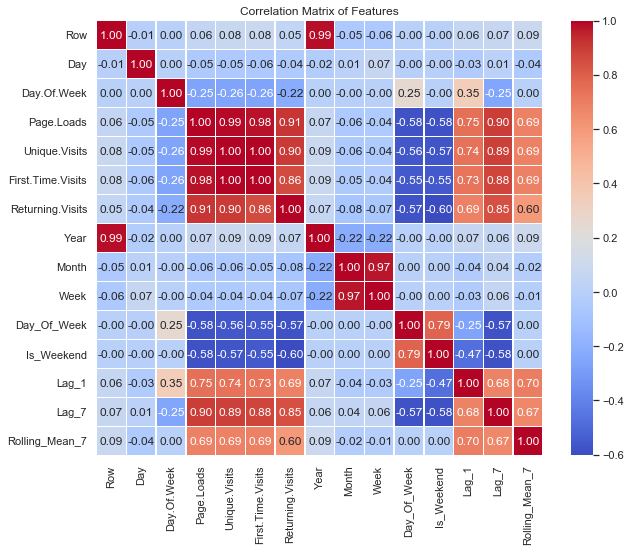

Important features related to 'Page.Loads' (correlation > 0.5):
 ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 'Lag_7', 'Lag_1', 'Rolling_Mean_7', 'Day_Of_Week', 'Is_Weekend']


In [69]:
# Calculate correlation between all columns and 'Page.Loads'
correlation_matrix = df.corr()

# Display correlation with 'Page.Loads' specifically
page_loads_correlation = correlation_matrix['Page.Loads'].sort_values(ascending=False)
print("Correlation with 'Page.Loads':\n", page_loads_correlation)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Select columns with high correlation
important_features = page_loads_correlation[page_loads_correlation.abs() > 0.5].index.tolist()

# Display important columns that are highly correlated with 'Page.Loads'
print("Important features related to 'Page.Loads' (correlation > 0.5):\n", important_features)

Feature Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the dataframe
df_scaled = scaler.fit_transform(df)

df_scaled

array([[-1.73125171e+00, -1.96977912e-01, -1.49878995e+00, ...,
        -1.45936105e+00, -1.45456969e+00, -1.19326415e+00],
       [-1.72965314e+00, -8.31812882e-02, -9.98731782e-01, ...,
        -1.45936105e+00, -1.45456969e+00, -1.19326415e+00],
       [-1.72805457e+00,  3.06153352e-02, -4.98673609e-01, ...,
        -3.67261703e-01, -1.45456969e+00, -1.19326415e+00],
       ...,
       [ 1.72805457e+00,  1.44411959e-01, -9.98731782e-01, ...,
        -1.03140619e+00, -3.52039503e-01, -9.54694251e-01],
       [ 1.72965314e+00,  2.58208582e-01, -4.98673609e-01, ...,
        -4.89428749e-01, -2.76665455e-01, -9.78717440e-01],
       [ 1.73125171e+00,  3.72005205e-01,  1.38456347e-03, ...,
        -3.96877957e-01, -2.56713501e-01, -1.23602241e+00]])

Data Spliting

In [21]:
# Split Data into Training and Testing Sets
split_point = int(len(df_scaled) * 0.8)
train = df.iloc[:split_point]
test = df.iloc[split_point:]

# Print dataset shapes
print(f"Training Set Shape: {train.shape}")
print(f"Testing Set Shape: {test.shape}")

# Define Features and Target Variable
features = ['Unique.Visits', 'First.Time.Visits', 'Returning.Visits', 
            'Day_Of_Week', 'Is_Weekend', 'Lag_1', 'Lag_7', 'Rolling_Mean_7']
target = 'Page.Loads'

X = df[features] # Feature matrix
y = df[target] # Target variable

# Train-Test Split for Regression Models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

Training Set Shape: (1733, 15)
Testing Set Shape: (434, 15)
X_train shape: (1733, 8), X_test shape: (434, 8)
y_train shape: (1733,), y_test shape: (434,)


Model Training Using ARIMA

In [22]:
# Prepare Time Series Data for ARIMA Model
train_series = train['Page.Loads']
test_series = test['Page.Loads']

# Train ARIMA Model
arima_model = ARIMA(train_series, order=(4, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast with ARIMA Model
arima_forecast_steps = len(test_series)
arima_forecast = arima_model_fit.forecast(steps=arima_forecast_steps)

c:\Users\eq0024au\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eq0024au\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eq0024au\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
# Evaluate Model Performance
arima_rmse = np.sqrt(mean_squared_error(test_series, arima_forecast))
arima_mape = mean_absolute_percentage_error(test_series, arima_forecast) * 100
arima_r2_score = r2_score(test_series, arima_forecast)

# Print Evaluation Metrics
print(f"ARIMA Model RMSE: {arima_rmse:.2f}")
print(f"ARIMA Model MAPE: {arima_mape:.2f}%")
print(f"ARIMA Model (R²) Score: {arima_r2_score:.2f}")

ARIMA Model RMSE: 1212.85
ARIMA Model MAPE: 26.32%
ARIMA Model (R²) Score: -0.05


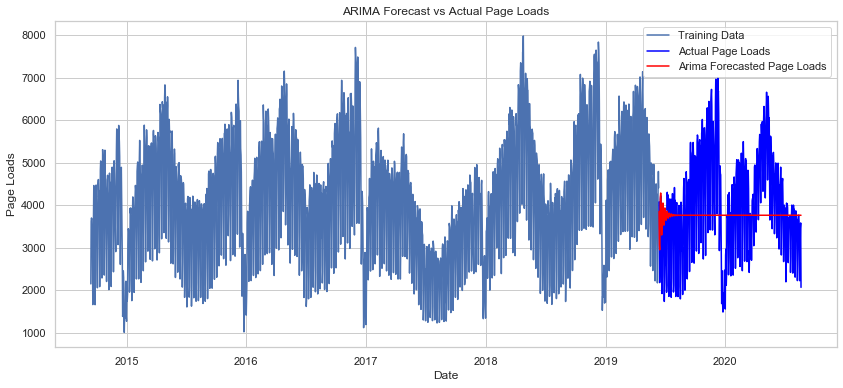

In [24]:
# Plot ARIMA Forecast vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(train_series.index, train_series, label='Training Data')
plt.plot(test_series.index, test_series, label='Actual Page Loads', color='blue')
plt.plot(test_series.index, arima_forecast, label='Arima Forecasted Page Loads', color='red')
plt.title('ARIMA Forecast vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Model Training Using Random Forest Regressor

In [25]:
# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Make Predictions with Random Forest Model
rf_predictions = rf_model.predict(X_test)

In [26]:
# Evaluate Model Performance
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions) * 100
rf_r2_score = r2_score(y_test, rf_predictions)

# Print Evaluation Metrics
print(f"Random Forest Model RMSE: {rf_rmse:.2f}")
print(f"Random Forest Model MAPE: {rf_mape:.2f}%")
print(f"Random Forest Model (R²) Score: {rf_r2_score:.2f}")

Random Forest Model RMSE: 299.63
Random Forest Model MAPE: 5.97%
Random Forest Model (R²) Score: 0.94


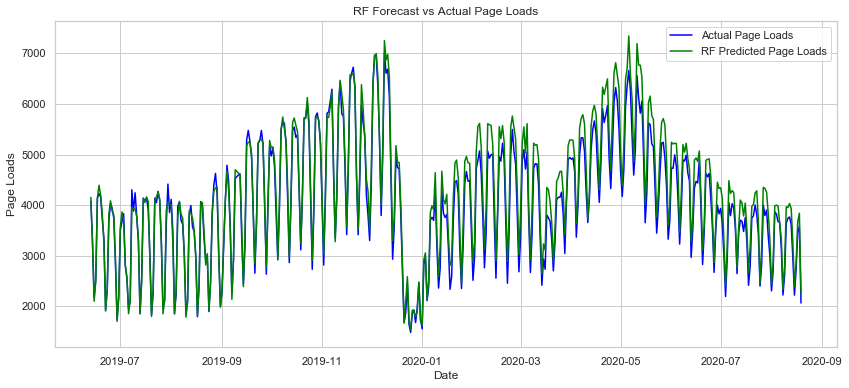

In [27]:
# Plot RF Forecast vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Page Loads', color='blue')
plt.plot(y_test.index, rf_predictions, label='RF Predicted Page Loads', color='green')
plt.title('RF Forecast vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Hyperparameter Tuning of Random Forest Regressor

In [28]:
# Define hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Define Random Forest Regressor Model
rf = RandomForestRegressor(random_state=99)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # 50 iterations
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=99,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Print best parameters
print(f"\nBest Hyperparameters: {best_params}")

# Evaluate the best model
best_rf_predictions = best_rf.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [29]:
# Evaluate Model Performance
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
best_rf_mape = mean_absolute_percentage_error(y_test, best_rf_predictions) * 100
best_rf_r2_score = r2_score(y_test, best_rf_predictions)

# Print Evaluation Metrics
print("Final Model Performance:")
print(f"Best Random Forest Model RMSE: {best_rf_rmse:.2f}")
print(f"Best Random Forest Model MAPE: {best_rf_mape:.2f}%")
print(f"Best Random Forest Model (R²) Score: {best_rf_r2_score:.2f}")

Final Model Performance:
Best Random Forest Model RMSE: 263.78
Best Random Forest Model MAPE: 5.34%
Best Random Forest Model (R²) Score: 0.95


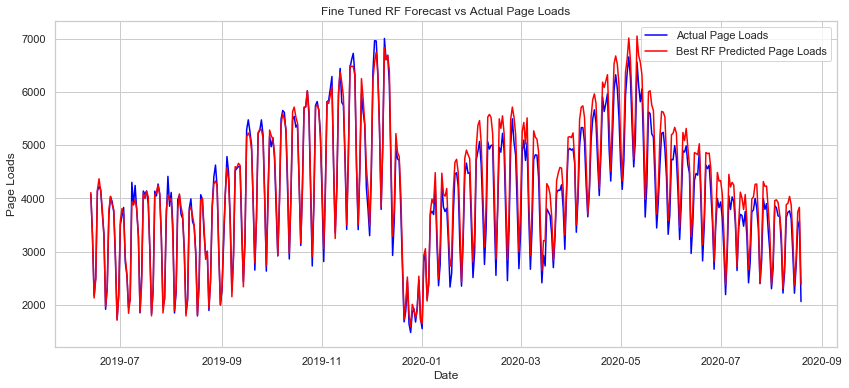

In [30]:
# Plot Fine Tuned RF Forecast vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Page Loads', color='blue')
plt.plot(y_test.index, best_rf_predictions, label='Best RF Predicted Page Loads', color='red')
plt.title('Fine Tuned RF Forecast vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Hybrid Model Forecast (ARIMA + Best RF)

In [31]:
# Assign weights based on performance
w_arima = 1 / arima_rmse
w_rf = 1 / best_rf_rmse
total_weight = w_arima + w_rf

# Compute weighted hybrid forecast (ARIMA + Best RF)
hybrid_forecast = (w_arima * arima_forecast.values + w_rf * best_rf_predictions) / total_weight

# Evaluate Model Performance
hybrid_rmse = np.sqrt(mean_squared_error(test_series, hybrid_forecast))
hybrid_mape = mean_absolute_percentage_error(test_series, hybrid_forecast) * 100
hybrid_r2_score = r2_score(test_series, hybrid_forecast)

# Print Evaluation Metrics
print(f"Hybrid Model RMSE: {hybrid_rmse:.2f}")
print(f"Hybrid Model MAPE: {hybrid_mape:.2f}%")
print(f"Hybrid Model (R²) Score: {hybrid_r2_score:.2f}")

Hybrid Model RMSE: 267.10
Hybrid Model MAPE: 6.47%
Hybrid Model (R²) Score: 0.95


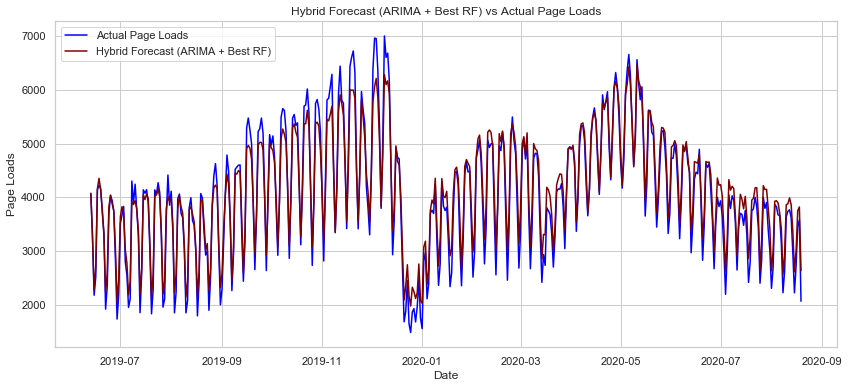

In [32]:
# Plot Hybrid Forecast (ARIMA + Best RF) vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(test_series.index, test_series, label='Actual Page Loads', color='blue')
plt.plot(test_series.index, hybrid_forecast, label='Hybrid Forecast (ARIMA + Best RF)', color='maroon')
plt.title('Hybrid Forecast (ARIMA + Best RF) vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Model Training Using LSTM 

In [33]:
# Set random seed for reproducibility
random_seed = 99
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# Reshape input data for LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile and train model
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=1)

# Predict using LSTM model
lstm_predictions = model_lstm.predict(X_test_lstm).flatten()

Epoch 1/50
109/109 [==============================] - 12s 13ms/step - loss: 8392073.0000
Epoch 2/50
109/109 [==============================] - 1s 12ms/step - loss: 106967.1016
Epoch 3/50
109/109 [==============================] - 1s 13ms/step - loss: 62888.9648
Epoch 4/50
109/109 [==============================] - 1s 14ms/step - loss: 57335.6602
Epoch 5/50
109/109 [==============================] - 1s 11ms/step - loss: 54751.4180
Epoch 6/50
109/109 [==============================] - 2s 15ms/step - loss: 63334.8320
Epoch 7/50
109/109 [==============================] - 2s 15ms/step - loss: 51250.6172
Epoch 8/50
109/109 [==============================] - 2s 14ms/step - loss: 46650.4961
Epoch 9/50
109/109 [==============================] - 1s 13ms/step - loss: 43510.8164
Epoch 10/50
109/109 [==============================] - 2s 16ms/step - loss: 41539.4102
Epoch 11/50
109/109 [==============================] - 1s 12ms/step - loss: 44404.7070
Epoch 12/50
109/109 [===========================

In [34]:
# Evaluate Model Performance
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_mape = mean_absolute_percentage_error(y_test, lstm_predictions) * 100
lstm_r2_score = r2_score(y_test, lstm_predictions)

# Print Evaluation Metrics
print(f"LSTM Model RMSE: {lstm_rmse:.2f}")
print(f"LSTM Model MAPE: {lstm_mape:.2f}%")
print(f"LSTM Model (R²) Score: {lstm_r2_score:.2f}")

LSTM Model RMSE: 245.97
LSTM Model MAPE: 5.02%
LSTM Model (R²) Score: 0.96


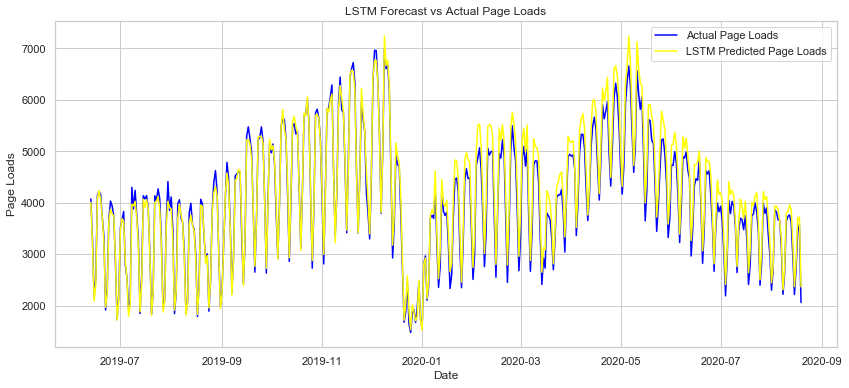

In [35]:
# Plot LSTM Forecast vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Page Loads', color='blue')
plt.plot(y_test.index, lstm_predictions, label='LSTM Predicted Page Loads', color='yellow')
plt.title('LSTM Forecast vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Hybrid Model Forecast (ARIMA + Best RF + LSTM)

In [36]:
# Assign weights based on performance
w_arima = 1 / arima_rmse
w_rf = 1 / best_rf_rmse
w_lstm = 1 / lstm_rmse
total_weight = w_arima + w_rf + w_lstm

# Compute weighted hybrid forecast (ARIMA + Best RF + LSTM)
hybrid_forecast = (w_arima * arima_forecast.values + w_rf * best_rf_predictions + w_lstm * lstm_predictions) / total_weight

# Evaluate Model Performance
hybrid_rmse = np.sqrt(mean_squared_error(test_series, hybrid_forecast))
hybrid_mape = mean_absolute_percentage_error(test_series, hybrid_forecast) * 100
hybrid_r2_score = r2_score(test_series, hybrid_forecast)

# Print Evaluation Metrics
print(f"Hybrid Model RMSE: {hybrid_rmse:.2f}")
print(f"Hybrid Model MAPE: {hybrid_mape:.2f}%")
print(f"Hybrid Model (R²) Score: {hybrid_r2_score:.2f}")

Hybrid Model RMSE: 227.24
Hybrid Model MAPE: 5.39%
Hybrid Model (R²) Score: 0.96


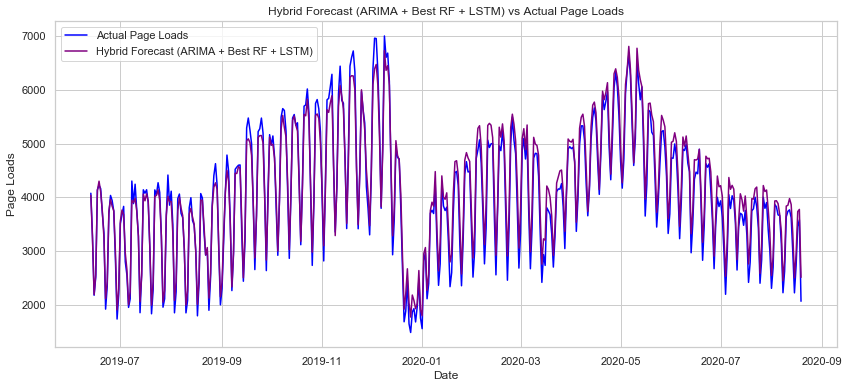

In [37]:
# Plot Hybrid Forecast (ARIMA + Best RF + LSTM) vs Actual Data
plt.figure(figsize=(14, 6))
plt.plot(test_series.index, test_series, label='Actual Page Loads', color='blue')
plt.plot(test_series.index, hybrid_forecast, label='Hybrid Forecast (ARIMA + Best RF + LSTM)', color='purple')
plt.title('Hybrid Forecast (ARIMA + Best RF + LSTM) vs Actual Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.legend()
plt.show()

Feature Importance For Hybrid Model

In [38]:
# Compute Feature Importance for Random Forest
rf_importance = best_rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X_train.columns, 'RF Importance': rf_importance})

In [39]:
# Compute Feature Importance for LSTM (Permutation Importance)

# Define LSTM Prediction Wrapper
def lstm_predict(X):
    X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))
    return model_lstm.predict(X_reshaped).flatten()

# Compute Permutation Importance for LSTM
perm_importance = permutation_importance(model_lstm, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=99)

# Convert to DataFrame
lstm_importance_df = pd.DataFrame({'Feature': X_train.columns, 'LSTM Importance': perm_importance.importances_mean})

14/14 [==============================] - 0s 6ms/step


Hybrid Model Feature Importance:
             Feature  Hybrid Importance
0      Unique.Visits      426371.071335
1  First.Time.Visits      356185.383047
5              Lag_1       30584.297055
2   Returning.Visits        7514.025056
6              Lag_7        1412.853454
7     Rolling_Mean_7        1052.002550
4         Is_Weekend          -7.482207
3        Day_Of_Week         -14.368359


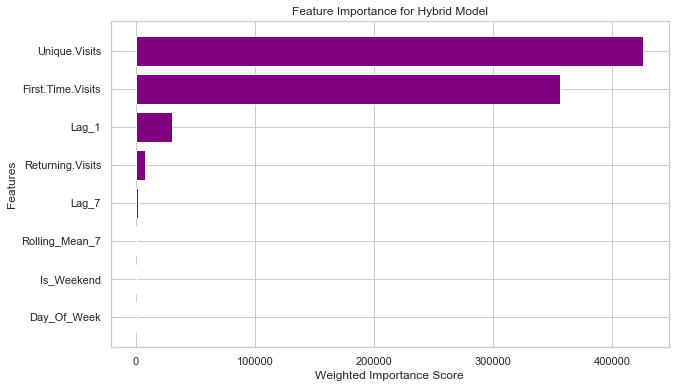

In [40]:
# Combine Feature Importance (Weighted)

# Normalize weights (excluding ARIMA since it lacks feature importance)
rf_weight = w_rf / (w_rf + w_lstm)
lstm_weight = w_lstm / (w_rf + w_lstm)

# Merge RF and LSTM importance
hybrid_importance_df = pd.merge(rf_importance_df, lstm_importance_df, on='Feature')

# Compute Weighted Feature Importance
hybrid_importance_df['Hybrid Importance'] = (rf_weight * hybrid_importance_df['RF Importance']) + (lstm_weight * hybrid_importance_df['LSTM Importance'])

# Sort by importance
hybrid_importance_df = hybrid_importance_df.sort_values(by='Hybrid Importance', ascending=False)

# Print Feature Importance
print("Hybrid Model Feature Importance:")
print(hybrid_importance_df[['Feature', 'Hybrid Importance']])

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(hybrid_importance_df['Feature'], hybrid_importance_df['Hybrid Importance'], color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Weighted Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Hybrid Model')
plt.show()